In [1]:
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
import matplotlib.pyplot as plt

In [3]:
m1 = 2e30

In [4]:
m2 = 8.7e25
r2 = 25560
r12 = 2871*1e6
v2 = 6.8
m3 = 3e21
r3 = 761
r23 = 584e3
v3 = 3.15
# m2 = 6e24
# r2 = 6378.
# r12 = 150*1e6
# v2 = 30.
# m3 = 7.3e22
# r3 = 1737.
# r23 = 384e3
# v3 = 1.

In [5]:
g = 6.67430e-11/1e9

In [6]:
x1, y1 = 0, 0
vx1, vy1 = 0, 0

In [7]:
x2, y2 = r12, 0
x3, y3 = r12+r23, 0

In [8]:
vx2, vy2 = 0, v2
vx3, vy3 = 0, v2+v3

In [9]:
class planet:
    def __init__(self, m, r=1, x=0, y=0, vx=0, vy=0):
        self.m = m
        self.r = r
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

    def coord(self):
        return np.array([self.x, self.y])

    def vel(self):
        return np.array([self.vx, self.vy])

In [10]:
def f_gr(p1: planet, p2: planet):
    dr = p2.coord - p1.coord

In [11]:
sun = planet(m1)
pl = planet(m2, r2, r12, 0, 0, v2)
sp = planet(m3, r3, r12+r23, 0, 0, v2+v3)

In [12]:
60*60*24*30*12

31104000

In [13]:
t_end = 60*60*24*30685.4
n = 100000
dt = t_end / n

Y:

```[y0, y1, y2, y3, y4,  y5,  y6,  y7, y8, y9, y10, y11]```

```[x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3]```

[vx1, vy1, vx2, vy2, vx3, vy3,

$G*[m2*(\frac {1} {((x1-x2)^2 + (y1-y2)^2)^(3/2)})*(x1-x2) + m3*(\frac {1} {((x3-x2)^2 + (y3-y2)^2)^(3/2)})*(x3-x2)]$, ...,

..., ...]

In [14]:
def system(t, y):
    dydt0 = y[6]
    dydt1 = y[7]
    dydt2 = y[8]
    dydt3 = y[9]
    dydt4 = y[10]
    dydt5 = y[11]
    dydt6 =  g*( m2*(y[2] - y[0])/((y[2] - y[0])**2+(y[3] - y[1])**2)**1.5 + m3*(y[4] - y[0])/((y[4] - y[0])**2+(y[5] - y[1])**2)**1.5 )
    dydt7 =  g*( m2*(y[3] - y[1])/((y[2] - y[0])**2+(y[3] - y[1])**2)**1.5 + m3*(y[5] - y[1])/((y[4] - y[0])**2+(y[5] - y[1])**2)**1.5 )
    dydt8 =  g*( m1*(y[0] - y[2])/((y[0] - y[2])**2+(y[1] - y[3])**2)**1.5 + m3*(y[4] - y[2])/((y[4] - y[2])**2+(y[5] - y[3])**2)**1.5 )
    dydt9 =  g*( m1*(y[1] - y[3])/((y[0] - y[2])**2+(y[1] - y[3])**2)**1.5 + m3*(y[5] - y[3])/((y[4] - y[2])**2+(y[5] - y[3])**2)**1.5 )
    dydt10 = g*( m1*(y[0] - y[4])/((y[0] - y[4])**2+(y[1] - y[5])**2)**1.5 + m2*(y[2] - y[4])/((y[2] - y[4])**2+(y[3] - y[5])**2)**1.5 )
    dydt11 = g*( m1*(y[1] - y[5])/((y[0] - y[4])**2+(y[1] - y[5])**2)**1.5 + m2*(y[3] - y[5])/((y[2] - y[4])**2+(y[3] - y[5])**2)**1.5 )
    return np.array([dydt0, dydt1, dydt2, dydt3, dydt4, dydt5, dydt6, dydt7, dydt8, dydt9, dydt10, dydt11])

In [15]:
init_cond = np.array([x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3])

In [16]:
t_span = (0, t_end)

In [17]:
n

100000

In [18]:
solution = solve_ivp(system, t_span, init_cond, method='RK45', t_eval=np.linspace(0, t_end, n))

In [19]:
y_cur = init_cond.copy()
t_cur = 0.
all_data = np.zeros((n, 12))

In [20]:
from tqdm import tqdm

In [21]:
for i in tqdm(range(n)):
    t_cur = t_end*(i+1)/n
    k1 = dt*system(t_cur, y_cur)
    k2 = dt*system(t_cur+dt/2, y_cur+k1/2)
    k3 = dt*system(t_cur+dt/2, y_cur+k2/2)
    k4 = dt*system(t_cur+dt, y_cur+k3)
    k = (k1 + 2*k2 + 2*k3 + k4) / 6
    y_cur = y_cur + k
    all_data[i] = y_cur
    if i == 0:
        print(all_data[i])

  0%|          | 0/100000 [00:00<?, ?it/s]

  1%|▏         | 1432/100000 [00:00<00:13, 7211.22it/s]

[ 2.47590871e-04  5.18252677e-09  2.87099999e+09  1.80282872e+05
  2.87157802e+09  2.63511012e+05  1.86775149e-08  5.86431483e-13
 -4.13841171e-04  6.80000110e+00 -4.50282633e-01  9.91777946e+00]


100%|██████████| 100000/100000 [00:14<00:00, 6715.01it/s]


In [22]:
x1_values = all_data[:,0]
y1_values = all_data[:,1]
x2_values = all_data[:,2]
y2_values = all_data[:,3]
x3_values = all_data[:,4]
y3_values = all_data[:,5]
vx1_values = all_data[:,6]
vy1_values = all_data[:,7]
vx2_values = all_data[:,8]
vy2_values = all_data[:,9]
vx3_values = all_data[:,10]
vy3_values = all_data[:,11]

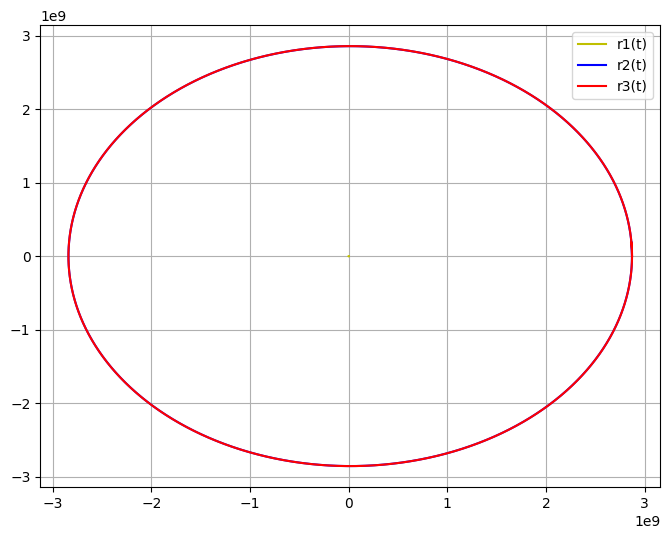

In [23]:
# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(x1_values, y1_values, 'y', label='r1(t)')
plt.plot(x2_values, y2_values, 'b', label='r2(t)')
plt.plot(x3_values, y3_values, 'r', label='r3(t)')
plt.legend()
plt.grid(True)
plt.show()

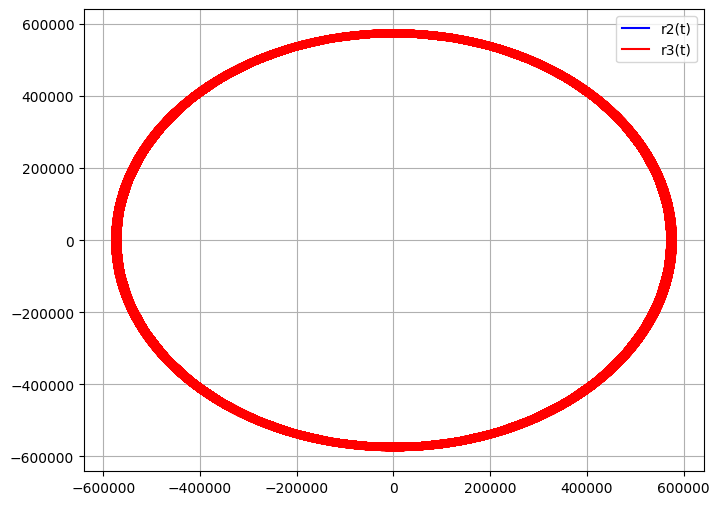

In [24]:
# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(x2_values-x2_values, y2_values-y2_values, 'b', label='r2(t)')
plt.plot(x3_values-x2_values, y3_values-y2_values, 'r', label='r3(t)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
min(y1_values)

5.182526772500683e-09

## Заново с пом odeint

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import odeint

In [3]:
from tqdm import tqdm

In [4]:
m1 = 2e30
m2 = 8.7e25
r2 = 25560
r12 = 2871*1e6
v2 = 6.8
m3 = 3e21
r3 = 761
r23 = 584e3
v3 = 3.15

In [5]:
g = 6.67430e-11/1e9

In [6]:
x1, y1 = 0, 0
vx1, vy1 = 0, 0
x2, y2 = r12, 0
x3, y3 = r12+r23, 0
vx2, vy2 = 0, v2
vx3, vy3 = 0, v2+v3

In [7]:
def f_gr(p1, p2):
    return g*(p2 - p1)/(np.linalg.norm(p1 - p2))**3

In [8]:
def system(y, t):
    dydt0, dydt1, dydt2, dydt3, dydt4, dydt5 = y[6:]
    f_12 = f_gr(y[0:2], y[2:4])
    f_13 = f_gr(y[0:2], y[4:6])
    f_23 = f_gr(y[2:4], y[4:6])
    dydt6, dydt7 = m2*f_12 + m3*f_13
    dydt8, dydt9 = -m1*f_12 + m3*f_23
    dydt10, dydt11 = -m1*f_13 - m2*f_23
    return np.array([dydt0, dydt1, dydt2, dydt3, dydt4, dydt5, dydt6, dydt7, dydt8, dydt9, dydt10, dydt11])



In [9]:
init_cond = np.array([0,0, r12, 0, r12+r23, 0, 0, 0, 0, v2, 0, v2+v3])

# init_cond = np.array([0,0, r12, 0, r12+r23, 0, r12+r2+h, 0, 0, 0, 0, v2, 0, v2+v3, 0, v2+np.sqrt(g*m2/(r2+h))])
assert len(init_cond) == 12

y_cur = init_cond.copy()
t_cur = 0.
# all_data = np.zeros((n, 16))

t_end = 60*60*24*30685.4
n = 100000
dt = t_end / n
t_eval = np.linspace(0, t_end, n+1)
sol = odeint(system, init_cond, t_eval)

In [10]:
x1_values = sol[:,0]
y1_values = sol[:,1]
x2_values = sol[:,2]
y2_values = sol[:,3]
x3_values = sol[:,4]
y3_values = sol[:,5]
vx1_values = sol[:,6]
vy1_values = sol[:,7]
vx2_values = sol[:,8]
vy2_values = sol[:,9]
vx3_values = sol[:,10]
vy3_values = sol[:,11]

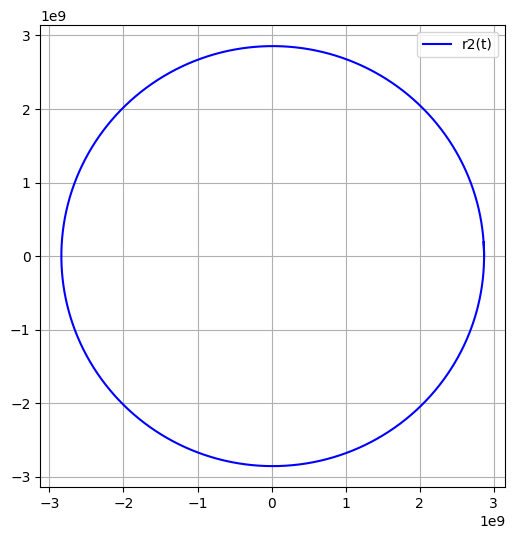

In [11]:
# Plot the solution
plt.figure(figsize=(6, 6))
# plt.plot(x1_values, y1_values, 'y', label='r1(t)')
plt.plot(x2_values, y2_values, 'b', label='r2(t)')
# plt.plot(x3_values, y3_values, 'r', label='r3(t)')
plt.legend()
plt.grid(True)
plt.show()

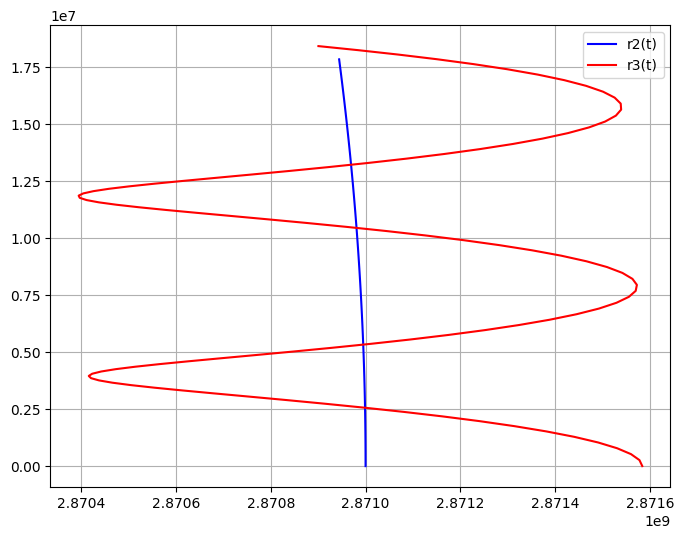

In [12]:
# Plot the solution
plt.figure(figsize=(8, 6))
sl_idx = 100
plt.plot(x2_values[:sl_idx]-x1_values[:sl_idx], y2_values[:sl_idx]-y1_values[:sl_idx], 'b', label='r2(t)')
plt.plot(x3_values[:sl_idx]-x1_values[:sl_idx], y3_values[:sl_idx]-y1_values[:sl_idx], 'r', label='r3(t)')
plt.legend()
plt.grid(True)
plt.show()